In [14]:
using ConstLab
using Plots
gadfly!()

Plots.GadflyPackage()

In [2]:
include("mises_viscoplast.jl")
E = 200.0 * 10^9
ν =  0.3
σy = E / 1e3
H = 0.1 * E
n = 1.5
σc =  0.1 * 200*10^9
t_star = 1.0
mp = ViscoPlastMP(E, ν, σy, H, n, σc, t_star)

ms = ViscoPlastMS()

α = 25.0
tend = α * t_star
ts = collect(linspace(0, tend, 100))

ε_max = 0.005
εs, σs, ε_control = loadcase(:uniaxial_strain, ε_max, ts);

εs_res, σs_res, matstats = driver(ms, mp, ts, εs, σs, ε_control);

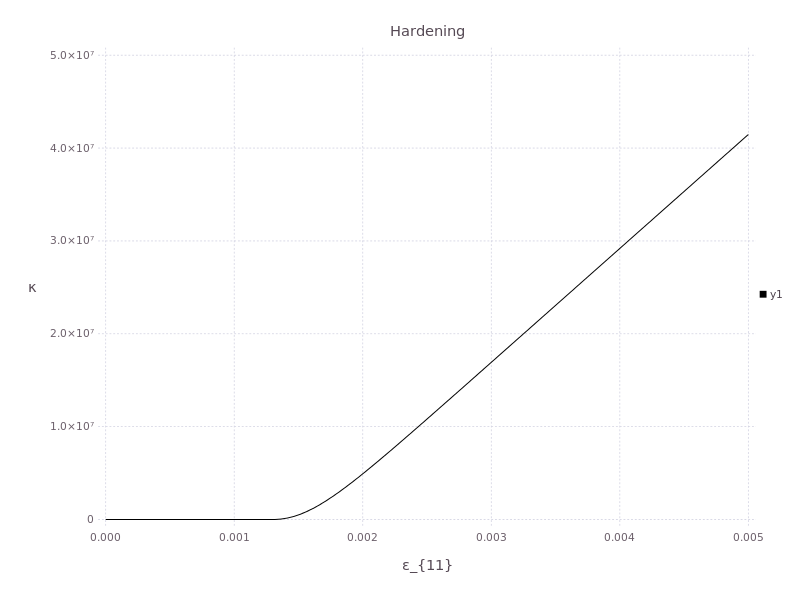

In [27]:
# Matrix as x-vector, x_mod = 1 --> take 1st component of each column
# Symbol as y-vector, matstat.n_κ is a scalar so no need for y_mod
p = plot(εs_res, :n_κ, matstats, x_mod = 1)
xlabel!(p, "ɛ_{11}")
ylabel!(p, "κ")
title!("Hardening")

In [19]:
function vm(x)
    x = Idev6 * x
    sqrt(3/2) * sqrt(x[1]^2 + x[2]^2 + x[3]^2 + (2x[4])^2 + (2x[5])^2 + (2x[6])^2)
end

vm (generic function with 1 method)

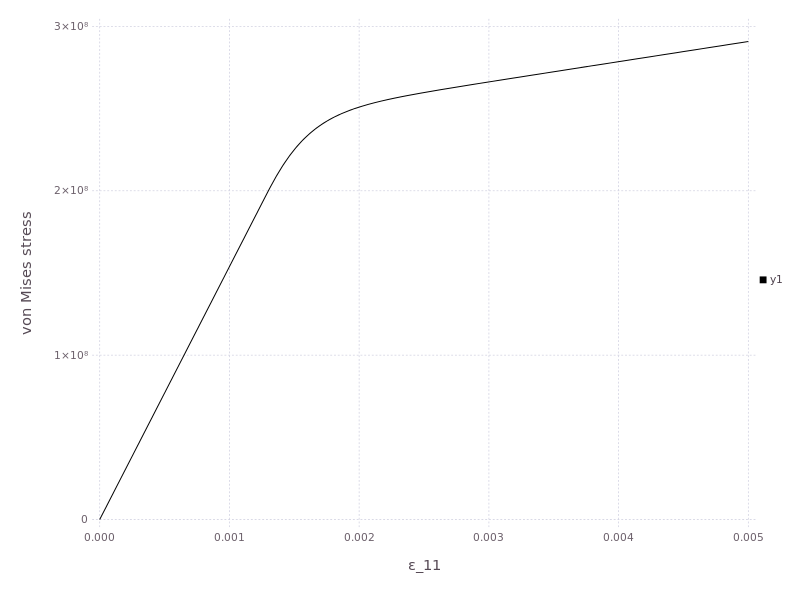

In [28]:
# Matrix as y-values, y_mod is a function --> function applied to each column
p = plot(εs_res, σs_res, matstats, x_mod = 1, y_mod = vm)
xlabel!(p, "ɛ_11")
ylabel!(p, "von Mises stress")

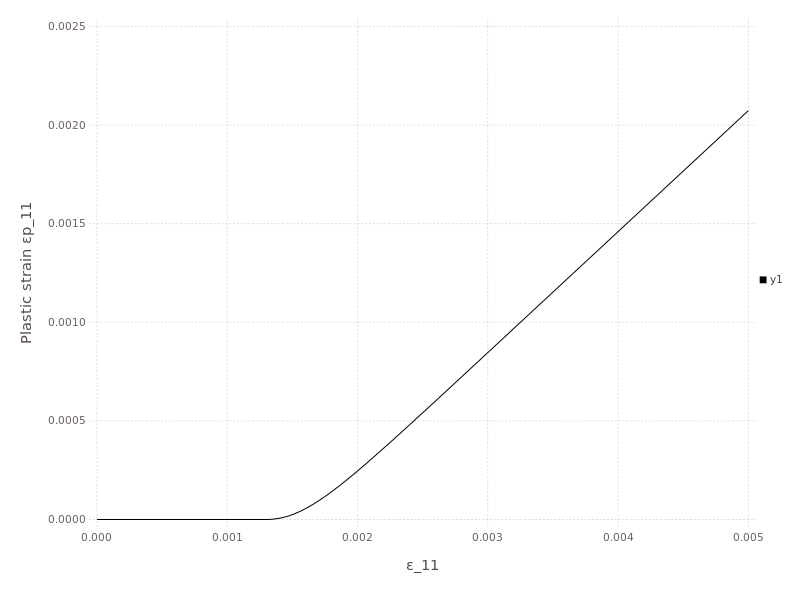

In [29]:
# y value matstat.n_ε_p is a vector, y_mod = 1 -> 1st component plotted
p = plot(εs_res, :n_ε_p, matstats, x_mod = 1, y_mod = 1)
ylabel!("Plastic strain εp_11")
xlabel!(p, "ɛ_11")